**Imports**

In [4]:
import random
import numpy as np
import pandas as pd
from datascience import *

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

**50/50 Odds**

In [5]:
def bet(funds, wager, number_bets):
    
    value = funds
    wager = wager
    
    x = [0]
    y = [funds]

    for i in np.arange(1,number_bets+1):
        roll = random.choice(make_array(1,2))
        if roll == 1:
            value += wager
            x.append(i)
            y.append(value)
        else: 
            value -= wager
            x.append(i)
            y.append(value)
        
    plot = plt.plot(x,y)
    
    return plot

In [6]:
def bettors(number_of_bettors, number_bets):
    for i in range(number_of_bettors):
        bet(0,1,number_bets)

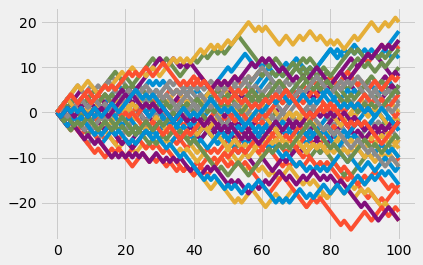

In [7]:
bettors(50,100)

In [18]:
def bet_poor(funds, wager, number_bets):
    
    value = funds
    wager = wager
    
    x = [0]
    y = [funds]

    for i in np.arange(1,number_bets+1):
        roll = random.choice(make_array(1,2))
        if roll == 1:
            value += wager
            x.append(i)
            y.append(value)
        else: 
            value -= wager
            x.append(i)
            y.append(value)
        
    plot = plt.plot(x,y)
    
    return plot

In [19]:
def bettors_poor(number_of_bettors, number_bets):
    for i in range(number_of_bettors):
        bet_poor(-10,1,number_bets)

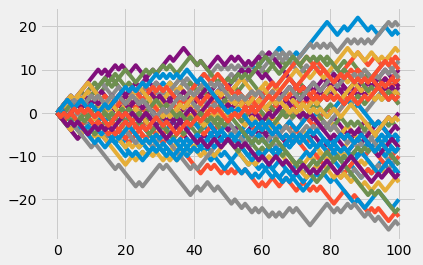

In [24]:
bettors(50,100)

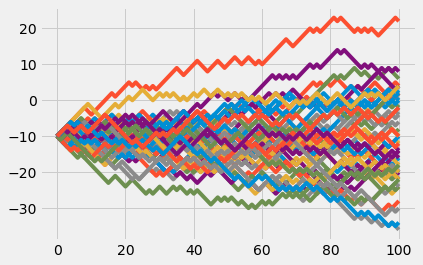

In [25]:
bettors_poor(50,100)

In [27]:
def flips(num):

    flips = make_array()

    for i in np.arange(num):
        flip = random.choice(make_array(0,1))
        flips = np.append(flips, flip)
        
        heads = np.mean(flips)
        
    return heads

In [28]:
def multiple_flips(number):
    
    results = make_array()
    
    for i in np.arange(number):
        result = flips(50)
        results = np.append(results, result)
        
    return results
        

In [29]:
max(multiple_flips(100))

0.68

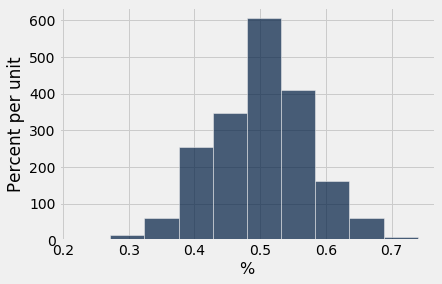

In [30]:
flip_table = Table().with_column('%',multiple_flips(1000))
flip_table.hist('%')

**Martingale Strategy**
with 50/50 odds

In [31]:
def m_bet(funds, initial_wager, number_bets):
    
    value = funds
    
    x = [0]
    y = [funds]

    count = 0
    previous_bet = 'Win'
    
    while count <= number_bets and value > 0:
        roll = random.choice(make_array(1,2))
        if previous_bet == 'Win':
            wager = initial_wager
            if roll == 1:
                value += wager
                count +=1
                x.append(count)
                y.append(value)
                previous_bet = 'Win'
            else: 
                value -= wager
                count +=1
                x.append(count)
                y.append(value)
                previous_bet = 'Lose'
        else:
            wager = wager * 2
            if roll == 1:
                value += wager
                count +=1
                x.append(count)
                y.append(value)
                previous_bet = 'Win'
            else: 
                value -= wager
                count +=1
                x.append(count)
                y.append(value)
                previous_bet = 'Lose'
                
            
    plot = plt.plot(x,y)
    
    return plot

In [32]:
def martingale_bettors(number_of_bettors, number_bets):
    for i in range(number_of_bettors):
        m_bet(10,1,number_bets)

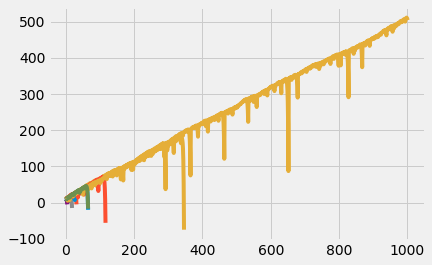

In [33]:
martingale_bettors(10,1000)

In [34]:
def dad_bet(funds, initial_wager, number_bets):
    
    value = funds
    
    x = [0]
    y = [funds]

    count = 0
    previous_bet = 'Lose'
    
    while count <= number_bets:
        roll = random.choice(make_array(1,2))
        if previous_bet == 'Lose':
            wager = initial_wager
            if roll == 1:
                value += wager
                count +=1
                x.append(count)
                y.append(value)
                previous_bet = 'Win'
            else: 
                value -= wager
                count +=1
                x.append(count)
                y.append(value)
                previous_bet = 'Lose'
        else:
            wager = wager * 2
            if roll == 1:
                value += wager
                count +=1
                x.append(count)
                y.append(value)
                previous_bet = 'Win'
            else: 
                value -= wager
                count +=1
                x.append(count)
                y.append(value)
                previous_bet = 'Lose'
                
            
    plot = plt.plot(x,y)
    
    return plot

In [35]:
def dad_bettors(number_of_bettors, number_bets):
    for i in range(number_of_bettors):
        dad_bet(10,1,number_bets)

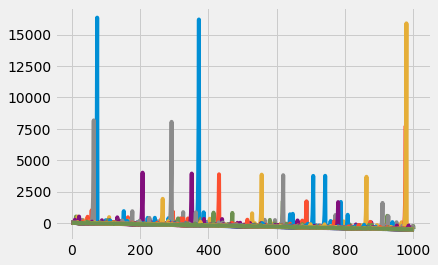

In [36]:
dad_bettors(100, 1000)

In [37]:
bruh = [1,2,3]
bruh.pop(0)
bruh.pop(-1)
bruh

[2]

In [38]:
def labouchere(funds, goal):
    
    starting_funds = funds
    goal = goal
    profit = 0
    broke = False
    system = [1,1,2,2,3,3,4,4]
    sum(system) == goal
    print(system)
    
    x = [0]
    y = [funds]
    
    
    while profit < goal and broke == False:
        roll = random.choice(make_array(1,2))
        if len(system) > 1:
            wager = system[0] + system[-1]
        else:
            wager = system[0]
        if roll == 1:
            profit+= wager
            funds += wager
            y.append(funds)
            system.pop(0)
            if len(system) > 1:
                system.pop(-1)
                print(system)
            else:
                print(system)
        else:
            profit-= wager
            funds -= wager
            y.append(funds)
            system.append(wager)
            print(system)
            if funds < 0:
                broke == True
            else:
                broke == False
                
    return print(y)

In [39]:
labouchere(100,20)

[1, 1, 2, 2, 3, 3, 4, 4]
[1, 2, 2, 3, 3, 4]
[2, 2, 3, 3]
[2, 3]
[2, 3, 5]
[2, 3, 5, 7]
[2, 3, 5, 7, 9]
[3, 5, 7]
[5]
[]
[100, 105, 110, 115, 110, 103, 94, 105, 115, 120]


In [40]:
def lab_bettors(number_of_bettors):
    for i in range(number_of_bettors):
        labouchere(100, 20)

In [41]:
lab_bettors(5)

[1, 1, 2, 2, 3, 3, 4, 4]
[1, 1, 2, 2, 3, 3, 4, 4, 5]
[1, 1, 2, 2, 3, 3, 4, 4, 5, 6]
[1, 2, 2, 3, 3, 4, 4, 5]
[1, 2, 2, 3, 3, 4, 4, 5, 6]
[1, 2, 2, 3, 3, 4, 4, 5, 6, 7]
[1, 2, 2, 3, 3, 4, 4, 5, 6, 7, 8]
[1, 2, 2, 3, 3, 4, 4, 5, 6, 7, 8, 9]
[1, 2, 2, 3, 3, 4, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 2, 3, 3, 4, 4, 5, 6, 7, 8, 9, 10, 11]
[1, 2, 2, 3, 3, 4, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[1, 2, 2, 3, 3, 4, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[1, 2, 2, 3, 3, 4, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[2, 2, 3, 3, 4, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[2, 3, 3, 4, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[2, 3, 3, 4, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14]
[3, 3, 4, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[3, 3, 4, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15]
[3, 4, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[3, 4, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15]
[3, 4, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 18]
[3, 4, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 18, 21]
[3, 4, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 18, 21, 24]
[4, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 18, 21]
[4, 4, 5, 6, 7, 8, 9,